## Using features  : minutes_remaining , period

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score



kobe_data = pd.read_csv('../data.csv')
display(kobe_data.head(10))

full_features = [kobe_data.columns]
# print(full_features)


# Target List (this is our y)
target = ['shot_made_flag']


# Features that we will not be using.
unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date']
removed_features = unused_features

feature_cols = ['minutes_remaining','period']

#removed_features = unused_features
# print(removed_features)

feature_cols = [feature for feature in kobe_data.columns if feature not in removed_features]
# print(feature_cols)
# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target].dropna()
# display(y.head(10))


# Data with all prediction data dropped (so that we don't learn from it)
X = kobe_data[feature_cols].dropna()
display(X.head(10))

# final = merged.drop(OHE_features, axis='columns')
# final_features = [final.columns]
# display(final.head(10))

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target].dropna()
display(y.head(10))


# X = final.dropna(subset=target)
# display(X.head(10))

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

k=3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent
1,Jump Shot,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR
2,Jump Shot,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR
3,Jump Shot,Jump Shot,33.8693,138,175,-118.1318,6,1,0,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR
4,Driving Dunk Shot,Dunk,34.0443,0,0,-118.2698,6,2,0,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR
5,Jump Shot,Jump Shot,34.0553,-145,-11,-118.4148,9,3,0,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR
6,Layup Shot,Layup,34.0443,0,0,-118.2698,8,3,0,52,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR
8,Jump Shot,Jump Shot,33.9363,-65,108,-118.3348,6,3,0,12,12,1.0,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,POR
9,Running Jump Shot,Jump Shot,33.9193,-33,125,-118.3028,3,3,0,36,12,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,POR
10,Jump Shot,Jump Shot,33.8063,-94,238,-118.3638,1,3,0,56,25,0.0,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,POR
11,Jump Shot,Jump Shot,33.9173,121,127,-118.1488,11,1,0,0,17,1.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,UTA


,shot_made_flag
1,0.0
2,1.0
3,0.0
4,1.0
5,0.0
6,1.0
8,1.0
9,0.0
10,0.0
11,1.0


(25697, 17)
(25697, 1)


ValueError: could not convert string to float: 'Jump Shot'

In [ ]:
scores = []
k_list = [i for i in range(1,20)]


for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

print(scores)



In [ ]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_list, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Using features loc_x	, loc_y	

In [93]:
import numpy as np
import pandas as pd

kobe_data = pd.read_csv('../data.csv')
# display(kobe_data.head(10))

full_features = [kobe_data.columns]
# print(full_features)


# Target List (this is our y)
target = ['shot_made_flag']


# Features that we will not be using.
unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date']
removed_features = unused_features

feature_cols = ['loc_x','loc_y']

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target]
# display(y.head(10))


# Data with all prediction data dropped (so that we don't learn from it)
X = kobe_data[feature_cols].dropna()
display(X.head(10))

# final = merged.drop(OHE_features, axis='columns')
# final_features = [final.columns]
# display(final.head(10))

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target].isnull()
display(y.head(10))


# X = final.dropna(subset=target)
# display(X.head(10))

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

scores = []
k_list = [i for i in range(1,20)]


for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

print(scores)





,loc_x,loc_y
0,167,72
1,-157,0
2,-101,135
3,138,175
4,0,0
5,-145,-11
6,0,0
7,1,28
8,-65,108
9,-33,125


,shot_made_flag
0,True
1,False
2,False
3,False
4,False
5,False
6,False
7,True
8,False
9,False


(30697, 2)
(30697, 1)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.7997393924586693


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was p

[0.7410212558025898, 0.825230067595081, 0.7997393924586693, 0.8316638162716834, 0.8223796726117762, 0.8350028503949833, 0.8299535792817004, 0.8369574069549638, 0.8337812525449955, 0.8391562830849417, 0.8374460460949589, 0.8393191627982735, 0.839074843228276, 0.8394006026549393, 0.8391562830849417, 0.8394006026549393, 0.8392377229416076, 0.8394820425116052, 0.8392377229416076]


## Using features : period , minutes remaining


In [ ]:
import numpy as np
import pandas as pd

kobe_data = pd.read_csv('../data.csv')
# display(kobe_data.head(10))

full_features = [kobe_data.columns]
# print(full_features)


# Target List (this is our y)
target = ['shot_made_flag']


# Features that we will not be using.
unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date']
removed_features = unused_features

feature_cols = ['period','minutes_remaining']

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target]
# display(y.head(10))


# Data with all prediction data dropped (so that we don't learn from it)
X = kobe_data[feature_cols].dropna()
display(X.head(10))

# final = merged.drop(OHE_features, axis='columns')
# final_features = [final.columns]
# display(final.head(10))

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target].isnull()
display(y.head(10))


# X = final.dropna(subset=target)
# display(X.head(10))

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)
print(X_test[0:10])

y_predict = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)





## shot_distance


In [ ]:
import numpy as np
import pandas as pd

kobe_data = pd.read_csv('../data.csv')
# display(kobe_data.head(10))

full_features = [kobe_data.columns]
# print(full_features)


# Target List (this is our y)
target = ['shot_made_flag']


feature_cols = ['shot_distance']

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target]
# display(y.head(10))


# Data with all prediction data dropped (so that we don't learn from it)
X = kobe_data[feature_cols].dropna()
display(X.head(10))

# final = merged.drop(OHE_features, axis='columns')
# final_features = [final.columns]
# display(final.head(10))

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target].isnull()
display(y.head(10))


# X = final.dropna(subset=target)
# display(X.head(10))

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)
print(X_test[0:10])

y_predict = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)






In [82]:
from itertools import permutations 

unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date']

feature_cols = [feature for feature in kobe_data.columns if feature not in removed_features]
X = kobe_data[feature_cols].dropna()






Text(0.5, 1.0, 'lat and lon')

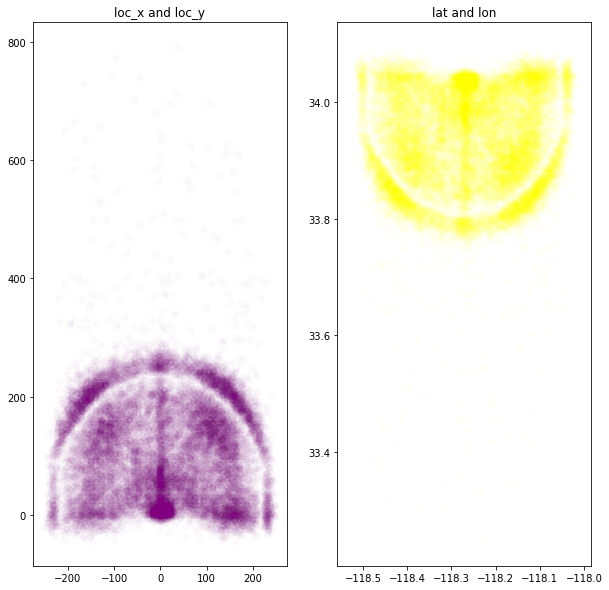

In [91]:
data =  kobe_data[pd.notnull(kobe_data['shot_made_flag'])]
alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(data.loc_x, data.loc_y, color='purple', alpha=alpha)
plt.title('loc_x and loc_y')

# lat and lon
plt.subplot(122)
plt.scatter(data.lon, data.lat, color='yellow', alpha=alpha)
plt.title('lat and lon')
